# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')
print(f'Are Nan values present? -> {data.isna().values.any()}')
print(f'Are duplicate rows present? -> {data.duplicated().values.any()}')
print('Data types of columns: ')
[type(data[column][0]) for column in data.columns]

The dataset has 5391 rows and 6 columns
Are Nan values present? -> False
Are duplicate rows present? -> False
Data types of columns: 


[numpy.int64, str, str, str, str, str]

In [5]:
data[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [6]:
data.USD_Production_Budget= data.USD_Production_Budget.astype(str).str.replace('$','').astype(str).str.replace(',','')
data.USD_Production_Budget= pd.to_numeric(data.USD_Production_Budget)
data.USD_Production_Budget.head()

0    110000
1    385907
2    200000
3    100000
4    245000
Name: USD_Production_Budget, dtype: int64

In [7]:
data.USD_Worldwide_Gross= pd.to_numeric(data.USD_Worldwide_Gross.astype(str).str.replace('$','').astype(str).str.replace(',',''))
data.USD_Domestic_Gross= pd.to_numeric(data.USD_Domestic_Gross.astype(str).str.replace('$','').astype(str).str.replace(',',''))

In [8]:
data[:2]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0


In [9]:
[type(data[column][0]) for column in data.columns]

[numpy.int64, str, str, numpy.int64, numpy.int64, numpy.int64]

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [10]:
type(data.Release_Date[0])

str

In [11]:
data.Release_Date= pd.to_datetime(data.Release_Date)
data.Release_Date[0]

Timestamp('1915-08-02 00:00:00')

In [12]:
type(data.Release_Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
data.head(2)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [14]:
print(f'Avg. Production Budget: {data.USD_Production_Budget.mean():.2f}')
print(f'Avg. Worldwide Gross Revenue: {data.USD_Worldwide_Gross.mean():.2f}')

Avg. Production Budget: 31113737.58
Avg. Worldwide Gross Revenue: 88855421.96


In [15]:
# What were the minimums for worldwide and domestic revenue?

print(f'Min Worldwide gross revenue: {data.USD_Worldwide_Gross.min()}')
print(f'Min Domestic gross revenue: {data.USD_Domestic_Gross.min()}')

Min Worldwide gross revenue: 0
Min Domestic gross revenue: 0


In [16]:
# What are the highest production budget and highest worldwide gross revenue of any film?
print(f'Highest Production Budget: {data.USD_Production_Budget.max():,}')
print(f'Highest Worldwide Gross Revenue: {data.USD_Worldwide_Gross.max():,}')

Highest Production Budget: 425,000,000
Highest Worldwide Gross Revenue: 2,783,918,982


In [17]:
# How much revenue did the lowest and highest budget films make?
low_idx= data.USD_Production_Budget.idxmin()
high_idx= data.USD_Production_Budget.idxmax()
print(f'Revenue of Lowest Budget Film: ${data.USD_Worldwide_Gross[low_idx]:,} (Budget: ${data.USD_Production_Budget.min():,})')
print(f'Revenue of Highest Budget Film: ${data.USD_Worldwide_Gross[high_idx]:,} (Budget: ${data.USD_Production_Budget.max():,})')

Revenue of Lowest Budget Film: $181,041 (Budget: $1,100)
Revenue of Highest Budget Film: $2,783,918,982 (Budget: $425,000,000)


In [18]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


- The bottom 25% of films are in loss. Since the avg. production cost is \\$5m and they only bring around \$3.8m in Worldwide revenue!

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [19]:
print(f"No of films that grossed $0 domestically(USA): {len(data[data.USD_Domestic_Gross == 0])}")
print(f'films that grossed nothing: {len(data[data.USD_Worldwide_Gross ==0])}')

No of films that grossed $0 domestically(USA): 512
films that grossed nothing: 357


In [20]:
print('highest budget films that grossed nothing: ')
data[data.USD_Worldwide_Gross == 0].sort_values('USD_Production_Budget',ascending=False)['Movie_Title'][:5]

highest budget films that grossed nothing: 


5388          Singularity
5387              Aquaman
5384    A Wrinkle in Time
5385       Amusement Park
5058     The Ridiculous 6
Name: Movie_Title, dtype: object

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [21]:
len(data[data.USD_Worldwide_Gross== 0])

357

In [22]:
print('Highest budgeet films that had no revenue internationally ')
data[data.USD_Worldwide_Gross==0].sort_values('USD_Production_Budget',ascending=False)['Movie_Title'][:5]

Highest budgeet films that had no revenue internationally 


5388          Singularity
5387              Aquaman
5384    A Wrinkle in Time
5385       Amusement Park
5058     The Ridiculous 6
Name: Movie_Title, dtype: object

### Filtering on Multiple Conditions

In [23]:
data[(data.USD_Worldwide_Gross !=0) & (data.USD_Domestic_Gross == 0)].head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [24]:
print(f"No of films that grossed $0 domestically(USA): {len(data.query('USD_Domestic_Gross == 0'))}")
print(f"films that grossed nothing: {len(data.query('USD_Worldwide_Gross ==0'))}")

No of films that grossed $0 domestically(USA): 512
films that grossed nothing: 357


In [25]:
print('Highest Budget films that grossed nothing:')
[movie for movie in data.query('USD_Worldwide_Gross ==0').sort_values('USD_Production_Budget',ascending=False)['Movie_Title'][:5]]

Highest Budget films that grossed nothing:


['Singularity',
 'Aquaman',
 'A Wrinkle in Time',
 'Amusement Park',
 'The Ridiculous 6']

In [26]:
len(data.query('USD_Worldwide_Gross ==0'))

357

In [27]:
international_releases = data.query('USD_Worldwide_Gross !=0 & USD_Domestic_Gross == 0')
international_releases[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [28]:
scrape_date = pd.to_datetime('2018/5/1')  # pd.Timestamp(2018/5/1)
future_releases= data[data.Release_Date >= scrape_date]
print(f'No of Unreleased Films: {len(future_releases)} ')
future_releases

No of Unreleased Films: 7 


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [29]:
data_clean = data.drop(future_releases.index)

In [30]:
in_loss= data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(f'No of movies that had no chance ot be screnned in the box office: {len(in_loss)}')

No of movies that had no chance ot be screnned in the box office: 2007


In [31]:
money_loss= data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
len(money_loss)

2007

In [32]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [33]:
print(f'{len(money_loss)/len(data_clean)*100:.2f} % of films do not recoup their production budget at the box office')

37.28 % of films do not recoup their production budget at the box office


# Seaborn for Data Viz: Bubble Charts

In [34]:
import seaborn as sns

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

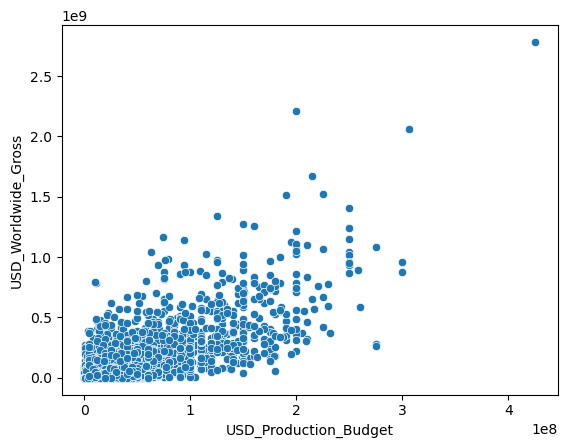

In [35]:
sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

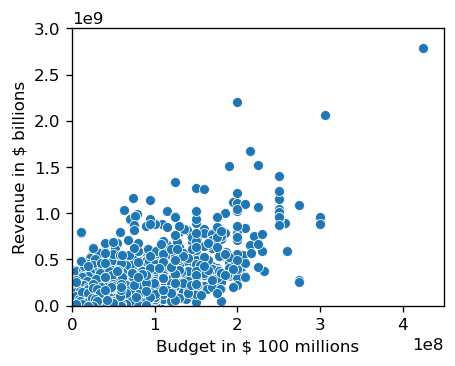

In [36]:
plt.figure(figsize=(4,3),dpi=120)
ax= sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')
ax.set(xlim=(0,450000000), 
      ylim= (0,3000000000),
      xlabel='Budget in $ 100 millions',
      ylabel='Revenue in $ billions')
    
plt.show()

### Bubble charts

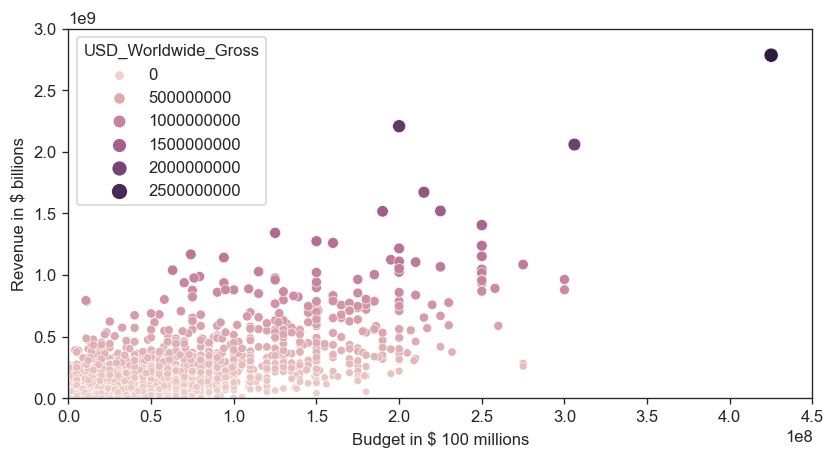

In [37]:
sns.set_style('ticks')
plt.figure(figsize=(8,4),dpi=120)
ax= sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross',  #COLOR
                size='USD_Worldwide_Gross')
ax.set(xlim=(0,450000000), 
      ylim= (0,3000000000),
      xlabel='Budget in $ 100 millions',
      ylabel='Revenue in $ billions')
plt.show()

## Plotting Movie Releases over Time

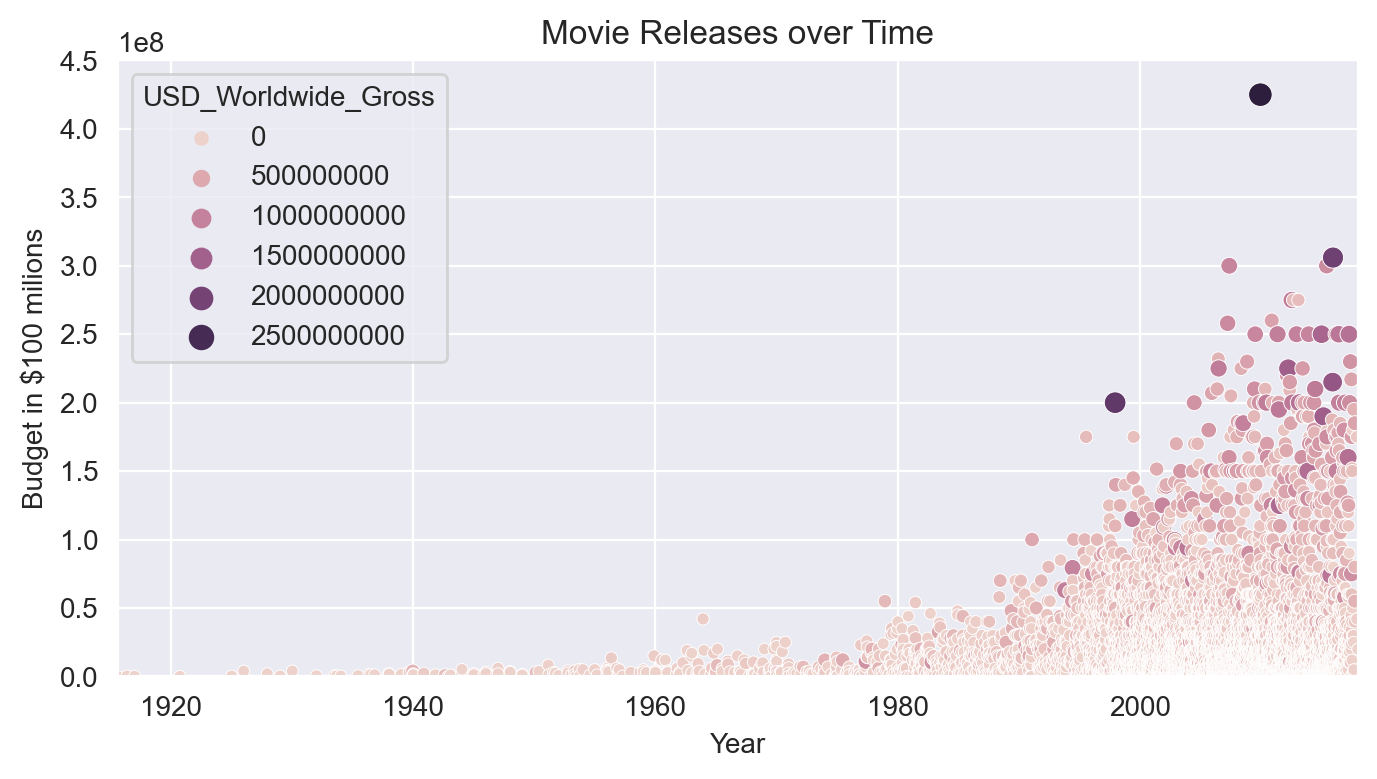

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4), dpi=200)
bubble= sns.scatterplot(data=data_clean, x='Release_Date', y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
bubble.set(xlabel='Year',
          ylabel='Budget in $100 milions',
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           ylim=(0,450000000)           
          )
plt.title('Movie Releases over Time')
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [39]:
dt_index= pd.DatetimeIndex(data_clean.Release_Date)
years= dt_index.year
data_clean['Decade'] = years//10*10

In [40]:
data_clean.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [41]:
old_films= data_clean[data_clean.Decade < 1970]
new_films= data_clean[data_clean.Decade >= 1970]

In [42]:
print(f'No of films prior to 1970: {len(old_films)}')
print(f'Most Expensive film made prior to 1970:  {old_films.loc[old_films.USD_Production_Budget.idxmax()].Movie_Title} ')

No of films prior to 1970: 153
Most Expensive film made prior to 1970:  Cleopatra 


In [43]:
old_films.sort_values('USD_Production_Budget',ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

In [44]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


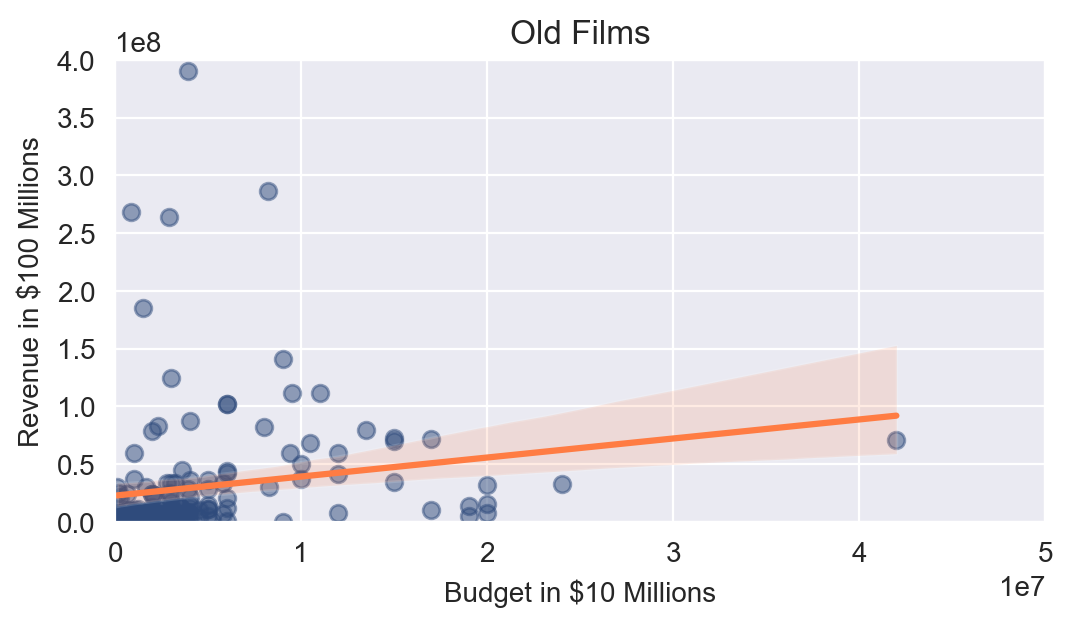

In [45]:
plt.figure(figsize=(6,3),dpi=200)
plt.title('Old Films')
with sns.axes_style('darkgrid'):    
    new_reg= sns.regplot(data=old_films,x='USD_Production_Budget',y='USD_Worldwide_Gross',
               scatter_kws= {'alpha':0.5, 'color':'#2f4b7c'},
               line_kws= {'color':'#ff7c43'}
               )
    new_reg.set(xlabel= 'Budget in $10 Millions',
               ylabel= 'Revenue in $100 Millions',
               xlim=(0,50000000),
               ylim=(0,400000000)               
               )
    

**Interpretation:**  we see that many lower budget films made much more money!  The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

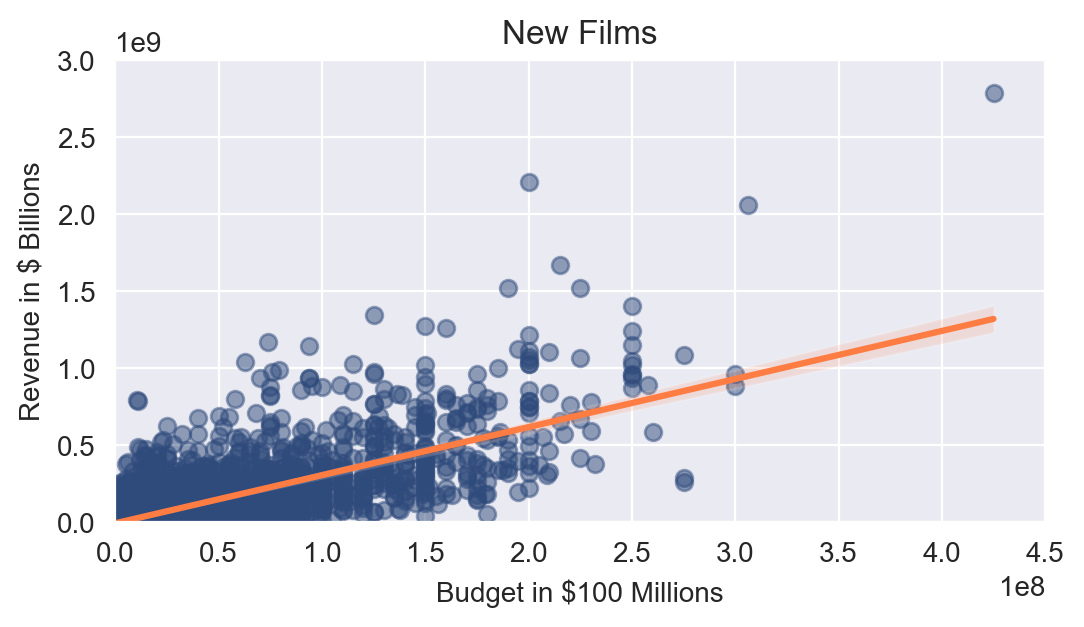

In [46]:
plt.figure(figsize=(6,3),dpi=200)
plt.title('New Films')
with sns.axes_style('darkgrid'):    
    new_reg= sns.regplot(data=new_films,x='USD_Production_Budget',y='USD_Worldwide_Gross',
               scatter_kws= {'alpha':0.5, 'color':'#2f4b7c'},
               line_kws= {'color':'#ff7c43'}
               )
    new_reg.set(xlabel= 'Budget in $100 Millions',
               ylabel= 'Revenue in $ Billions',
               xlim=(0,450000000),
               ylim=(0,3000000000)               
               )
    

**Interpretation:** We can see this visually from the fact that our data points line up much better with our regression line . Also, the confidence interval is much narrower. A film with a $150 million budget is predicted to make slightly under $500 million by our regression line.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [47]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression()

### linear regression: y= mx+c
* c- (y intercept): value of y when x= 0 
* m(slope): change in of y when x is changed by 1 unit dy/dx

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [48]:
x= old_films[['USD_Production_Budget']]
y= old_films[['USD_Worldwide_Gross']]

In [49]:
# best-fit line
regression.fit(x,y)

LinearRegression()

In [50]:
print('****Old Films****')
print(f'slope coeff(m): {regression.coef_[0]}')   # slope(m)   or theta-1
print(f'intercept(c): {regression.intercept_[0]}')  # c = y-intercept  or theta-0
print(f'r-squared(R)): {regression.score(x,y)}')

****Old Films****
slope coeff(m): [1.64771314]
intercept(c): 22821538.635080382
r-squared(R)): 0.02937258620576877


**Summary:** R-square is only 3%. This makes sense considering how poorly our data points aligned with our line earlier.

In [51]:
x= new_films[['USD_Production_Budget']]
y= new_films[['USD_Worldwide_Gross']]
regression.fit(x,y)

LinearRegression()

In [52]:
print('****New Films****')
print(f'slope coeff(m): {regression.coef_[0]}')   # slope(m)   or theta-1
print(f'intercept(c): {regression.intercept_[0]:.2f}')  # c = y-intercept  or theta-0
print(f'r-squared(R)): {regression.score(x,y):.2f}')

****New Films****
slope coeff(m): [3.12259592]
intercept(c): -8650768.01
r-squared(R)): 0.56


**Summary:** Literally, means that if a movie budget is \\$0, the estimated movie revenue is -\\$8.65 million.
- The reason y-intercept is -ve is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that we can't have negative revenue or a negative budget.
- After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).
- R-square= 0.56 means that about 56% of the variance in movie revenue.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

## Estimated Revenue  for Newer Films

In [53]:
budget= 350000000
revenue= regression.coef_[0][0] * budget + regression.intercept_[0]
print(f'Revenue: {revenue:.2f}')

Revenue: 1084257803.06


In [54]:
revenue =round(revenue,-6)
print(f'Estimated revenue from $350 milllion budget: {revenue}')

Estimated revenue from $350 milllion budget: 1084000000.0


In [55]:
print(f'{revenue:.10}')

1.084e+09


For a \\$350 million budget film, our model predicts a worldwide revenue of around $1.08 billion!